# Aviation Accident Analysis

# Business Understanding

The company is planning to diversify by purchasing and operating airplanes for commercial and private enterprises. The Head of Aviation has little knowledge of the risk it imposes and will use the insights from this analysis to decide which aircraft to purchase. I will analyze a dataset from the National Transportation Safety Board to determine the safety of plane types and provide multiple suggestions 
to the Head of Aviation.

# Data Understanding

The dataset used for this analysis is provided by the National Transportation Safety Board. It includes civil aviation accidents and other selected incidents from 1962 to 2023. This step is focused on understanding what is in the dataset so it can be further analyzed to answer the business question.

Each record of this dataset represents an aviation accident, marked by the "Event ID", with information about the plane (make, model, etc.) and the severity of the accident (# of injuries).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#import aviation and us stat code csv files
aviation_df = pd.read_csv('./data/AviationData.csv', encoding='latin-1')
us_state_df = pd.read_csv('./data/USState_Codes.csv', encoding='latin-1')

/var/folders/sk/8hr8rsms4cb5y3ryy9w5yplh0000gn/T/ipykernel_85524/3088602378.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('./data/AviationData.csv', encoding='latin-1')


In [3]:
#Print first few rows of the dataframes
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
us_state_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [5]:
#Print the shape of aviation_df
aviation_df.shape

(88889, 31)

In [6]:
#Print what data type is in each column
aviation_df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [7]:
#print general information of aviation_df
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [8]:
#Print the percentage of data missing in each column
round(aviation_df.isna().sum()/ aviation_df.shape[0] * 100, 1)

Event.Id                   0.0
Investigation.Type         0.0
Accident.Number            0.0
Event.Date                 0.0
Location                   0.1
Country                    0.3
Latitude                  61.3
Longitude                 61.3
Airport.Code              43.6
Airport.Name              40.7
Injury.Severity            1.1
Aircraft.damage            3.6
Aircraft.Category         63.7
Registration.Number        1.6
Make                       0.1
Model                      0.1
Amateur.Built              0.1
Number.of.Engines          6.8
Engine.Type                8.0
FAR.Description           64.0
Schedule                  85.8
Purpose.of.flight          7.0
Air.carrier               81.3
Total.Fatal.Injuries      12.8
Total.Serious.Injuries    14.1
Total.Minor.Injuries      13.4
Total.Uninjured            6.7
Weather.Condition          5.1
Broad.phase.of.flight     30.6
Report.Status              7.2
Publication.Date          15.5
dtype: float64

There are multiple columns with over 50% of it is missing data. The Latitude, Longitude, Aircraft Category, FAR Description, Schedule and Air Carrier columns may not be useful to use in this analysis due to the large amount of missing data

In [9]:
#Check different Make of Airplanes
aviation_df['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [10]:
#Check different phases of flight when accident occured
aviation_df['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [11]:
#Check for duplicats in the dataframe
aviation_df[aviation_df.duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [12]:
#Checking for any extraneous values that may be used to replace missing data
for col in aviation_df.columns:
    print(col, '\n', aviation_df[col].value_counts(normalize=True).head(), '\n\n')

Event.Id 
 Event.Id
20001212X19172    0.000034
20001214X45071    0.000034
20220730105623    0.000022
20051213X01965    0.000022
20001212X16765    0.000022
Name: proportion, dtype: float64 


Investigation.Type 
 Investigation.Type
Accident    0.956418
Incident    0.043582
Name: proportion, dtype: float64 


Accident.Number 
 Accident.Number
CEN22LA149    0.000022
WPR23LA041    0.000022
WPR23LA045    0.000022
DCA22WA214    0.000022
DCA22WA089    0.000022
Name: proportion, dtype: float64 


Event.Date 
 Event.Date
1984-06-30    0.000281
1982-05-16    0.000281
2000-07-08    0.000281
1983-08-05    0.000270
1984-08-25    0.000270
Name: proportion, dtype: float64 


Location 
 Location
ANCHORAGE, AK      0.004885
MIAMI, FL          0.002251
ALBUQUERQUE, NM    0.002206
HOUSTON, TX        0.002173
CHICAGO, IL        0.002071
Name: proportion, dtype: float64 


Country 
 Country
United States     0.927647
Brazil            0.004218
Canada            0.004049
Mexico            0.004038
United Ki

## Data Preparation

The aviation data set needs to be cleaned and organized so that the analysis will produce clear and accurate results. This includes dropping unnecessary columns from the dataset, dropping appropriate rows, and reformatting data. 

The "Make" column needs to be normalized, so there are no repeat values with different formats.



In [13]:
#Normalize "Make" Column Data
aviation_df['Make'] = aviation_df['Make'].str.lower().str.title()
aviation_df['Make'].value_counts()

Make
Cessna           27149
Piper            14870
Beech             5372
Boeing            2745
Bell              2722
                 ...  
Cohen                1
Kitchens             1
Lutes                1
Izatt                1
Royse Ralph L        1
Name: count, Length: 7587, dtype: int64

In [14]:
#Reformat Column Names to remove periods between words
aviation_df.columns = aviation_df.columns.str.replace('.', ' ').str.title()

In [15]:
aviation_df.columns

Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'Far Description',
       'Schedule', 'Purpose Of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase Of Flight', 'Report Status',
       'Publication Date'],
      dtype='object')

The number of injuries will be important to look at, however, there are approximately 12-15% of rows missing data about the number of injuries. 

# Exploratory Data Analysis

In [79]:
#Average Number of Fatal Injuries per Accident for Top Manufacturers 
injuries = aviation_df.groupby('Make')\
            [['Total Fatal Injuries','Total Serious Injuries','Total Minor Injuries','Total Uninjured']].agg(['mean','sum'])
top_injuries = injuries.sort_values(('Total Fatal Injuries','sum'), ascending = False)[0:10]
top_injuries

Total Fatal Injuries         Total Serious Injuries          \
                                  mean     sum                   mean     sum   
Make                                                                            
Cessna                        0.404880  9641.0               0.208682  4894.0   
Boeing                        3.853744  8748.0               0.932555  2157.0   
Piper                         0.506934  6689.0               0.236508  3059.0   
Beech                         0.789155  3784.0               0.237579  1095.0   
Bell                          0.566327  1332.0               0.375374   878.0   
Airbus                        4.835766  1325.0               0.700730   192.0   
Mcdonnell Douglas             2.771552  1286.0               1.170526   556.0   
Airbus Industrie             12.229167  1174.0               1.277778   138.0   
Douglas                       3.951807   984.0               0.423387   105.0   
Mooney                        0.592048   685.0               0.220444   248.0   

                  Total Minor Injuries         Total Uninjured            
                                  mean     sum            mean       sum  
Make                                                                      
Cessna                        0.289809  6876.0        1.339416   34423.0  
Boeing                        1.206204  2761.0       80.734212  208375.0  
Piper                         0.288889  3757.0        1.272260   17832.0  
Beech                         0.290260  1341.0        1.599635    7891.0  
Bell                          0.475424  1122.0        1.228309    3072.0  
Airbus                        0.386861   106.0       73.822917   21261.0  
Mcdonnell Douglas             3.161765  1505.0       79.126316   45102.0  
Airbus Industrie              3.873786   399.0      140.801325   21261.0  
Douglas                       0.984064   247.0       32.854478    8805.0  
Mooney                        0.340889   391.0        1.063673    1303.0

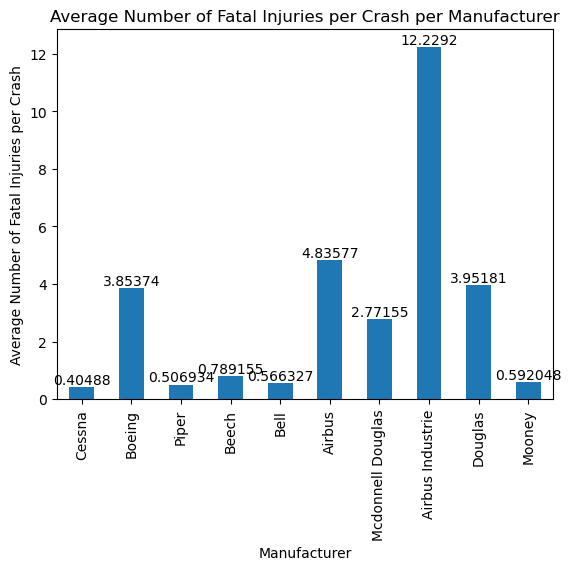

In [78]:
ax = top_injuries.plot.bar(y=('Total Fatal Injuries','mean'),\
                     legend = False,\
                     xlabel = 'Manufacturer',\
                     ylabel = 'Average Number of Fatal Injuries per Crash',\
                     title = 'Average Number of Fatal Injuries per Crash per Manufacturer',\
                     );

ax.bar_label(ax.containers[0]);

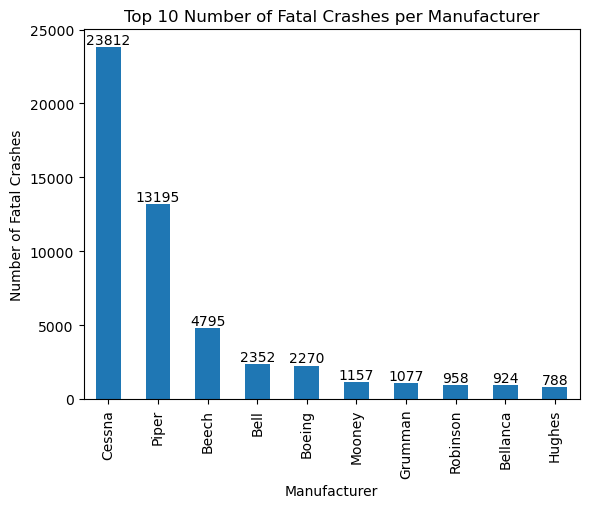

In [69]:
#Which Manufacturer has the most number of fatal crashes
num_fatal_acc = aviation_df.groupby('Make')['Total Fatal Injuries'].count().sort_values(ascending = False)[0:10]

ax = num_fatal_acc.plot.bar(title = 'Top 10 Number of Fatal Crashes per Manufacturer',\
                       xlabel = 'Manufacturer',\
                       ylabel = 'Number of Fatal Crashes');
ax.bar_label(ax.containers[0]);

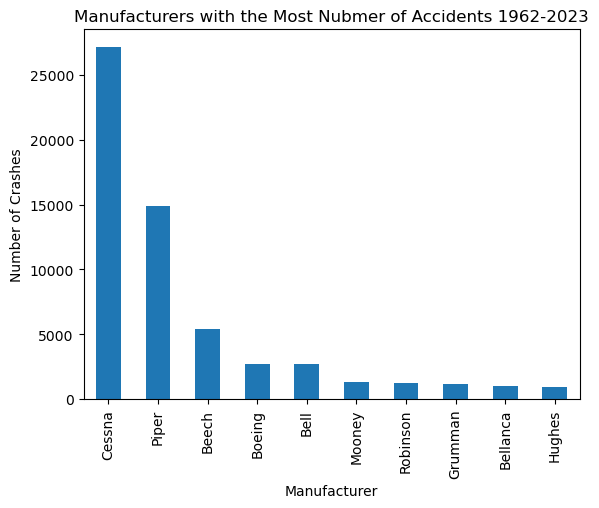

In [63]:
#Which Manufacturer has the most number of fatal crashes
num_acc = aviation_df['Make'].value_counts()[0:10]

num_acc.plot.bar(title = 'Manufacturers with the Most Nubmer of Accidents 1962-2023',\
                       xlabel = 'Manufacturer',\
                       ylabel = 'Number of Crashes');

In [91]:
injuries_make_model = aviation_df.groupby(['Make','Model'])\
            [['Total Fatal Injuries','Total Serious Injuries','Total Minor Injuries','Total Uninjured']].agg(['mean','sum'])
top_injuries_make_model = injuries_make_model.sort_values(('Total Fatal Injuries','sum'), ascending = False)[0:10]
top_injuries_make_model

Total Fatal Injuries         Total Serious Injuries         \
                                  mean     sum                   mean    sum   
Make    Model                                                                  
Boeing  737                   2.802495  1348.0               0.804979  388.0   
        737-200              22.650000   906.0               2.378378   88.0   
        777 - 206           178.000000   534.0               0.000000    0.0   
Cessna  172N                  0.432323   428.0               0.212590  206.0   
Boeing  MD-82               100.750000   403.0               0.666667    2.0   
Cessna  172                   0.244172   398.0               0.191975  311.0   
        152                   0.181649   390.0               0.094437  202.0   
Airbus  A321                 19.050000   381.0               0.000000    0.0   
Piper   PA-28-181             0.818966   380.0               0.250559  112.0   
Tupolev TU-154              349.000000   349.0                    NaN    0.0   

                  Total Minor Injuries        Total Uninjured           
                                  mean    sum            mean      sum  
Make    Model                                                           
Boeing  737                   0.189189   91.0       52.455670  25441.0  
        737-200               2.000000   70.0       66.625000   2665.0  
        777 - 206             0.000000    0.0        0.000000      0.0  
Cessna  172N                  0.345842  341.0        1.229508   1350.0  
Boeing  MD-82                 9.000000   18.0       89.285714    625.0  
Cessna  172                   0.239730  391.0        1.314252   2250.0  
        152                   0.194457  421.0        1.027826   2364.0  
Airbus  A321                  0.100000    2.0       67.450000   1349.0  
Piper   PA-28-181             0.412556  184.0        1.323045    643.0  
Tupolev TU-154                     NaN    0.0             NaN      0.0

# Conclusion

## Limitations

## Recommendations 

## Next Steps

Study financial cost of owning/operting these planes. What are the maintencance costs? What is profitabiity?